In [32]:
%pip install jax

import numpy as np
import time
import numpy as np
import time
import jax


Defaulting to user installation because normal site-packages is not writeable
  Using cached jax-0.7.0-py3-none-any.whl.metadata (13 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
Using cached jax-0.7.0-py3-none-any.whl (2.8 MB)
   ---------------------------------------- 0.0/60.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/60.2 MB 16.7 MB/s eta 0:00:04
   ---- ----------------------------------- 6.3/60.2 MB 19.6 MB/s eta 0:00:03
   ------- -------------------------------- 10.7/60.2 MB 20.6 MB/s eta 0:00:03
   ---------- ----------------------------- 15.5/60.2 MB 21.3 MB/s eta 0:00:03
   ------------- -------------------------- 20.4/60.2 MB 22.0 MB/s eta 0:00:02
   ---------------- ----------------------- 25.4/60.2 MB 22.3 MB/s eta 0:00:02
   ------------------- -------------------- 29.6/60.2 MB 22.0 MB/s eta 0:00:02
   ----------------------- ---------------- 34.9/60.2 MB 22.5 MB/s eta 0:00:02
   ------------------------ --------------- 36.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\anujj\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Question 1
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

## Answer
The resulting matrix will have the shape (n, m). <br><br>
$$
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1k} \\
a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \vdots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}
\times
\begin{bmatrix}
b_{11} & b_{12} & \cdots & b_{1m} \\
b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \vdots & \vdots \\
b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}
=
\begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} + \cdots + a_{1k}b_{k1} & a_{11}b_{12} + a_{12}b_{22} + \cdots + a_{1k}b_{k2} & \cdots & a_{11}b_{1m} + a_{12}b_{2m} + \cdots + a_{1k}b_{km} \\
a_{21}b_{11} + a_{22}b_{21} + \cdots + a_{2k}b_{k1} & a_{21}b_{12} + a_{22}b_{22} + \cdots + a_{2k}b_{k2} & \cdots & a_{21}b_{1m} + a_{22}b_{2m} + \cdots + a_{2k}b_{km} \\
\vdots & \vdots & \vdots & \vdots \\
a_{n1}b_{11} + a_{n2}b_{21} + \cdots + a_{nk}b_{k1} & a_{n1}b_{12} + a_{n2}b_{22} + \cdots + a_{nk}b_{k2} & \cdots & a_{n1}b_{1m} + a_{n2}b_{2m} + \cdots + a_{nk}b_{km}
\end{bmatrix}
$$
<br>

To compute each entry in the output matrix, we multiply each element of a row from matrix <b>a</b> by the corresponding element of a column from matrix <b>b</b>, and then sum the results. This means each entry requires k multiplications and (k-1) additions. <br>
The total number of multiplications is <b>k × n × m</b>.<br>
The total number of additions is <b>(k-1) × n × m</b>.

# Question 2
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

1.) Matrix multiplication using list of lists

In [34]:
def matmul_list(A, B):
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])
    if cols_A != rows_B:
        return "Dimension mismatch"
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]
    for r in range(rows_A):
        for c in range(cols_B):
            for i in range(cols_A):
                result[r][c] += A[r][i] * B[i][c]
    return result

2.) Matrix multiplication using numpy

In [35]:
def matrix_multiplication_numpy(A,B):
    return np.dot(A,B)

Time comparison of both the approaches

In [37]:
A = np.random.random(size=(10,10))
B = np.random.random(size=(10,10))

start = time.time()
print(matmul_list(A,B))
end = time.time()
list_time = end-start

start = time.time()
end = time.time()
numpy_time = end-start

print(f'Time taken by list of lists method: {list_time}')
print(f'Time taken by numpy method: {numpy_time}')
if (numpy_time < list_time):
  print("Numpy multiplication is faster")
else:
  print("List of lists multiplication is faster")



[[np.float64(3.067115232898365), np.float64(3.5848596062042306), np.float64(2.0887201177798365), np.float64(2.4980248753338365), np.float64(2.6516117914369133), np.float64(3.5497345454741502), np.float64(2.5443453110837773), np.float64(2.5468914931649977), np.float64(2.8744722579995416), np.float64(2.1422354724926387)], [np.float64(2.5961841438820663), np.float64(3.432309737579933), np.float64(1.515704750200123), np.float64(1.8968480794526659), np.float64(1.9517666837890535), np.float64(2.8123196809172364), np.float64(2.0128804697040583), np.float64(2.3245522086752644), np.float64(2.915762018694527), np.float64(1.8783962660910025)], [np.float64(2.159113588798111), np.float64(2.8274718375051298), np.float64(1.283474118146967), np.float64(1.472868358457677), np.float64(2.019645440788288), np.float64(2.210706234880833), np.float64(1.611117046114971), np.float64(1.5004368735649718), np.float64(1.7866598269959217), np.float64(1.7835786977505848)], [np.float64(2.193935720067923), np.float64(

 Numpy is faster because its operations are implemented in optimized C code and use efficient algorithms for matrix multiplication.
 It leverages vectorized operations and low-level libraries (like BLAS and LAPACK) that are highly optimized for performance.
 In contrast, the list-of-lists approach uses Python loops, which are much slower due to Python's interpreted nature and lack of optimization.
 Therefore, numpy can perform large-scale numerical computations much more efficiently than pure Python code.

# Question 3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against <code>numpy.median</code> routine in terms of time?

Time complexity of finding median by this method is <i> O(n<sup>2</sup>)</i>

In [40]:
def kth_smallest(data, k):
    temp = data.copy()
    for _ in range(k + 1):
        smallest = float('inf')
        smallest_idx = -1
        for idx in range(len(temp)):
            if temp[idx] < smallest:
                smallest = temp[idx]
                smallest_idx = idx
        if smallest_idx != -1:
            temp[smallest_idx] = float('inf')
    return smallest

def calculate_median(data):
    n = len(data)
    if n % 2 != 0:
        return kth_smallest(data, n // 2)
    return (kth_smallest(data, n // 2 - 1) + kth_smallest(data, n // 2)) / 2

A better method would be sotring the array or using  quickselect algorithm both of which would take time complexity O(n log(n)).

In [41]:
def calculate_median_sort(data):
    temp = data.copy()
    temp.sort()
    n = len(temp)
    if n % 2 == 0:
        return (temp[n // 2] + temp[n // 2 - 1]) / 2
    else:
        return temp[n // 2]

def calculate_median_numpy(data):
    return np.median(data)

In [43]:
arr = [np.random.randint(1, 100) for _ in range(10001)]

start = time.time()
print(f"Median calculated by looping method = {calculate_median(arr)}")
end = time.time()
looping_time = end - start

start = time.time()
print(f"Median calculated by sorting = {calculate_median_sort(arr)}")
end = time.time()
sorting_time = end - start

start = time.time()
print(f"Median calculated by np.median = {calculate_median_numpy(arr)}")
end = time.time()
numpy_time = end - start

print(f"Time taken by looping method: {looping_time:.6f}")
print(f"Time taken by sorting method: {sorting_time:.6f}")
print(f"Time taken by numpy.median: {numpy_time:.6f}")

Median calculated by looping method = 49
Median calculated by sorting = 49
Median calculated by np.median = 49.0
Time taken by looping method: 1.430975
Time taken by sorting method: 0.000821
Time taken by numpy.median: 0.001675


The median is found fastest using <code>np.median</code>, then by <b>sorting</b>, and finally by the <b>looping</b>

# Question 4
What is the gradient of the following function with respect to x and y ?<br><br>
\begin{equation} x^2y + y^3sin(x) \end{equation}

The derivative of the function w.r.t x \begin{equation} 2xy + y^3cos(x)  \end{equation}
The derivative of the function w.r.t y \begin{equation} x^2 + 3y^2sin(x)  \end{equation}

# Question 5
Use <code>JAX</code> to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [45]:
import jax.numpy as jnp

def f(x, y):
    return y * (x ** 2) + (y ** 3) * jnp.sin(x)

gradient = jax.grad(f, argnums=(0, 1))

def grad(x, y):
    grad_x = 2 * x * y + (y ** 3) * np.cos(x)
    grad_y = x ** 2 + 3 * (y ** 2) * np.sin(x)
    return grad_x, grad_y

In [47]:
x_values = np.random.randint(1, 10, size=3)
y_values = np.random.randint(1, 10, size=3)

for i in range(3):
    x = float(x_values[i])
    y = float(y_values[i])
    jax_grad = gradient(x, y)
    analytical_grad = grad(x, y)
    print(f"Test values: x = {x}, y = {y}")
    print(f"JAX gradient: ({jax_grad[0]}, {jax_grad[1]})")
    print(f"Analytical gradient: {analytical_grad}")

Test values: x = 3.0, y = 6.0
JAX gradient: (-177.83837890625, 24.24095916748047)
Analytical gradient: (np.float64(-177.8383792656962), np.float64(24.24096087046566))
Test values: x = 8.0, y = 7.0
JAX gradient: (62.09348678588867, 209.4356689453125)
Analytical gradient: (np.float64(62.09348840364556), np.float64(209.43566225363713))
Test values: x = 9.0, y = 8.0
JAX gradient: (-322.4986877441406, 160.1267547607422)
Analytical gradient: (np.float64(-322.4986940849546), np.float64(160.12674916641726))


# Question 6
Use <code>sympy</code> to confirm that you obtain the same gradient analytically.



In [48]:
from sympy import symbols, sin, diff

x, y = symbols('x y')
print(diff((x**2)*y+(y**3)*sin(x),x))
print(diff((x**2)*y+(y**3)*sin(x),y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


# Question 7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [50]:
students_data = {
    2022: {
        "ComputerScience": {
            "alice": {"roll_no": 1, "name": "Alice", "marks": {"math": 95, "english": 88}},
            "bob": {"roll_no": 2, "name": "Bob", "marks": {"math": 78, "english": 90}}
        },
        "Mechanical": {
            "carol": {"roll_no": 3, "name": "Carol", "marks": {"math": 85, "english": 80}},
            "dave": {"roll_no": 4, "name": "Dave", "marks": {"math": 92, "english": 75}}
        }
    },
    2023: {
        "ComputerScience": {},
        "Mechanical": {}
    },
    2024: {
        "ComputerScience": {},
        "Mechanical": {}
    },
    2025: {
        "ComputerScience": {},
        "Mechanical": {}
    }
}

In [51]:
print(students_data)

{2022: {'ComputerScience': {'alice': {'roll_no': 1, 'name': 'Alice', 'marks': {'math': 95, 'english': 88}}, 'bob': {'roll_no': 2, 'name': 'Bob', 'marks': {'math': 78, 'english': 90}}}, 'Mechanical': {'carol': {'roll_no': 3, 'name': 'Carol', 'marks': {'math': 85, 'english': 80}}, 'dave': {'roll_no': 4, 'name': 'Dave', 'marks': {'math': 92, 'english': 75}}}}, 2023: {'ComputerScience': {}, 'Mechanical': {}}, 2024: {'ComputerScience': {}, 'Mechanical': {}}, 2025: {'ComputerScience': {}, 'Mechanical': {}}}


# Question 8
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [52]:
class Marks:
    def __init__(self, subject, marks):
        self.subject = subject
        self.marks = marks

class Student:
    def __init__(self, name, roll_no):
        self.name = name
        self.roll_no = roll_no
        self.marks = []

    def add_marks(self, subject, marks):
        mark = Marks(subject, marks)
        self.marks.append(mark)

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

In [ ]:
data = []
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

branch1_2022 = Branch("ComputerScience")
student1 = Student("A", 1)
student1.add_marks("Maths", 95)
student1.add_marks("English", 88)
branch1_2022.add_student(student1)
student2 = Student("B", 2)
student2.add_marks("Maths", 78)
student2.add_marks("English", 90)
branch1_2022.add_student(student2)

branch2_2022 = Branch("Mechanical")
student3 = Student("C", 3)
student3.add_marks("Maths", 85)
student3.add_marks("English", 80)
branch2_2022.add_student(student3)
student4 = Student("D", 4)
student4.add_marks("Maths", 92)
student4.add_marks("English", 75)
branch2_2022.add_student(student4)

year_2022.add_branch(branch1_2022)
year_2022.add_branch(branch2_2022)

branch1_2023 = Branch("ComputerScience")
branch2_2023 = Branch("Mechanical")
year_2023.add_branch(branch1_2023)
year_2023.add_branch(branch2_2023)

branch1_2024 = Branch("ComputerScience")
branch2_2024 = Branch("Mechanical")
year_2024.add_branch(branch1_2024)
year_2024.add_branch(branch2_2024)

branch1_2025 = Branch("ComputerScience")
branch2_2025 = Branch("Mechanical")
year_2025.add_branch(branch1_2025)
year_2025.add_branch(branch2_2025)

database = [year_2022, year_2023, year_2024, year_2025]

# Example: Print all students in ComputerScience 2022
for student in year_2022.branches[0].students:
    print(f"Name: {student.name}, Roll No: {student.roll_no}, Marks: {[{'subject': m.subject, 'marks': m.marks} for m in student.marks]}")

Name: Alice, Roll No: 1, Marks: [{'subject': 'Maths', 'marks': 95}, {'subject': 'English', 'marks': 88}]
Name: Bob, Roll No: 2, Marks: [{'subject': 'Maths', 'marks': 78}, {'subject': 'English', 'marks': 90}]


# Question 9
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5

In [54]:
x = np.arange(0.5,100.5,0.5)

In [55]:
y_1 = x
y_2 = x**2
y_3 = (x**3)/100
y_4 = np.sin(x)
y_5 = np.sin(x)/x
y_6 = np.log(x)
y_7 = np.exp(x)

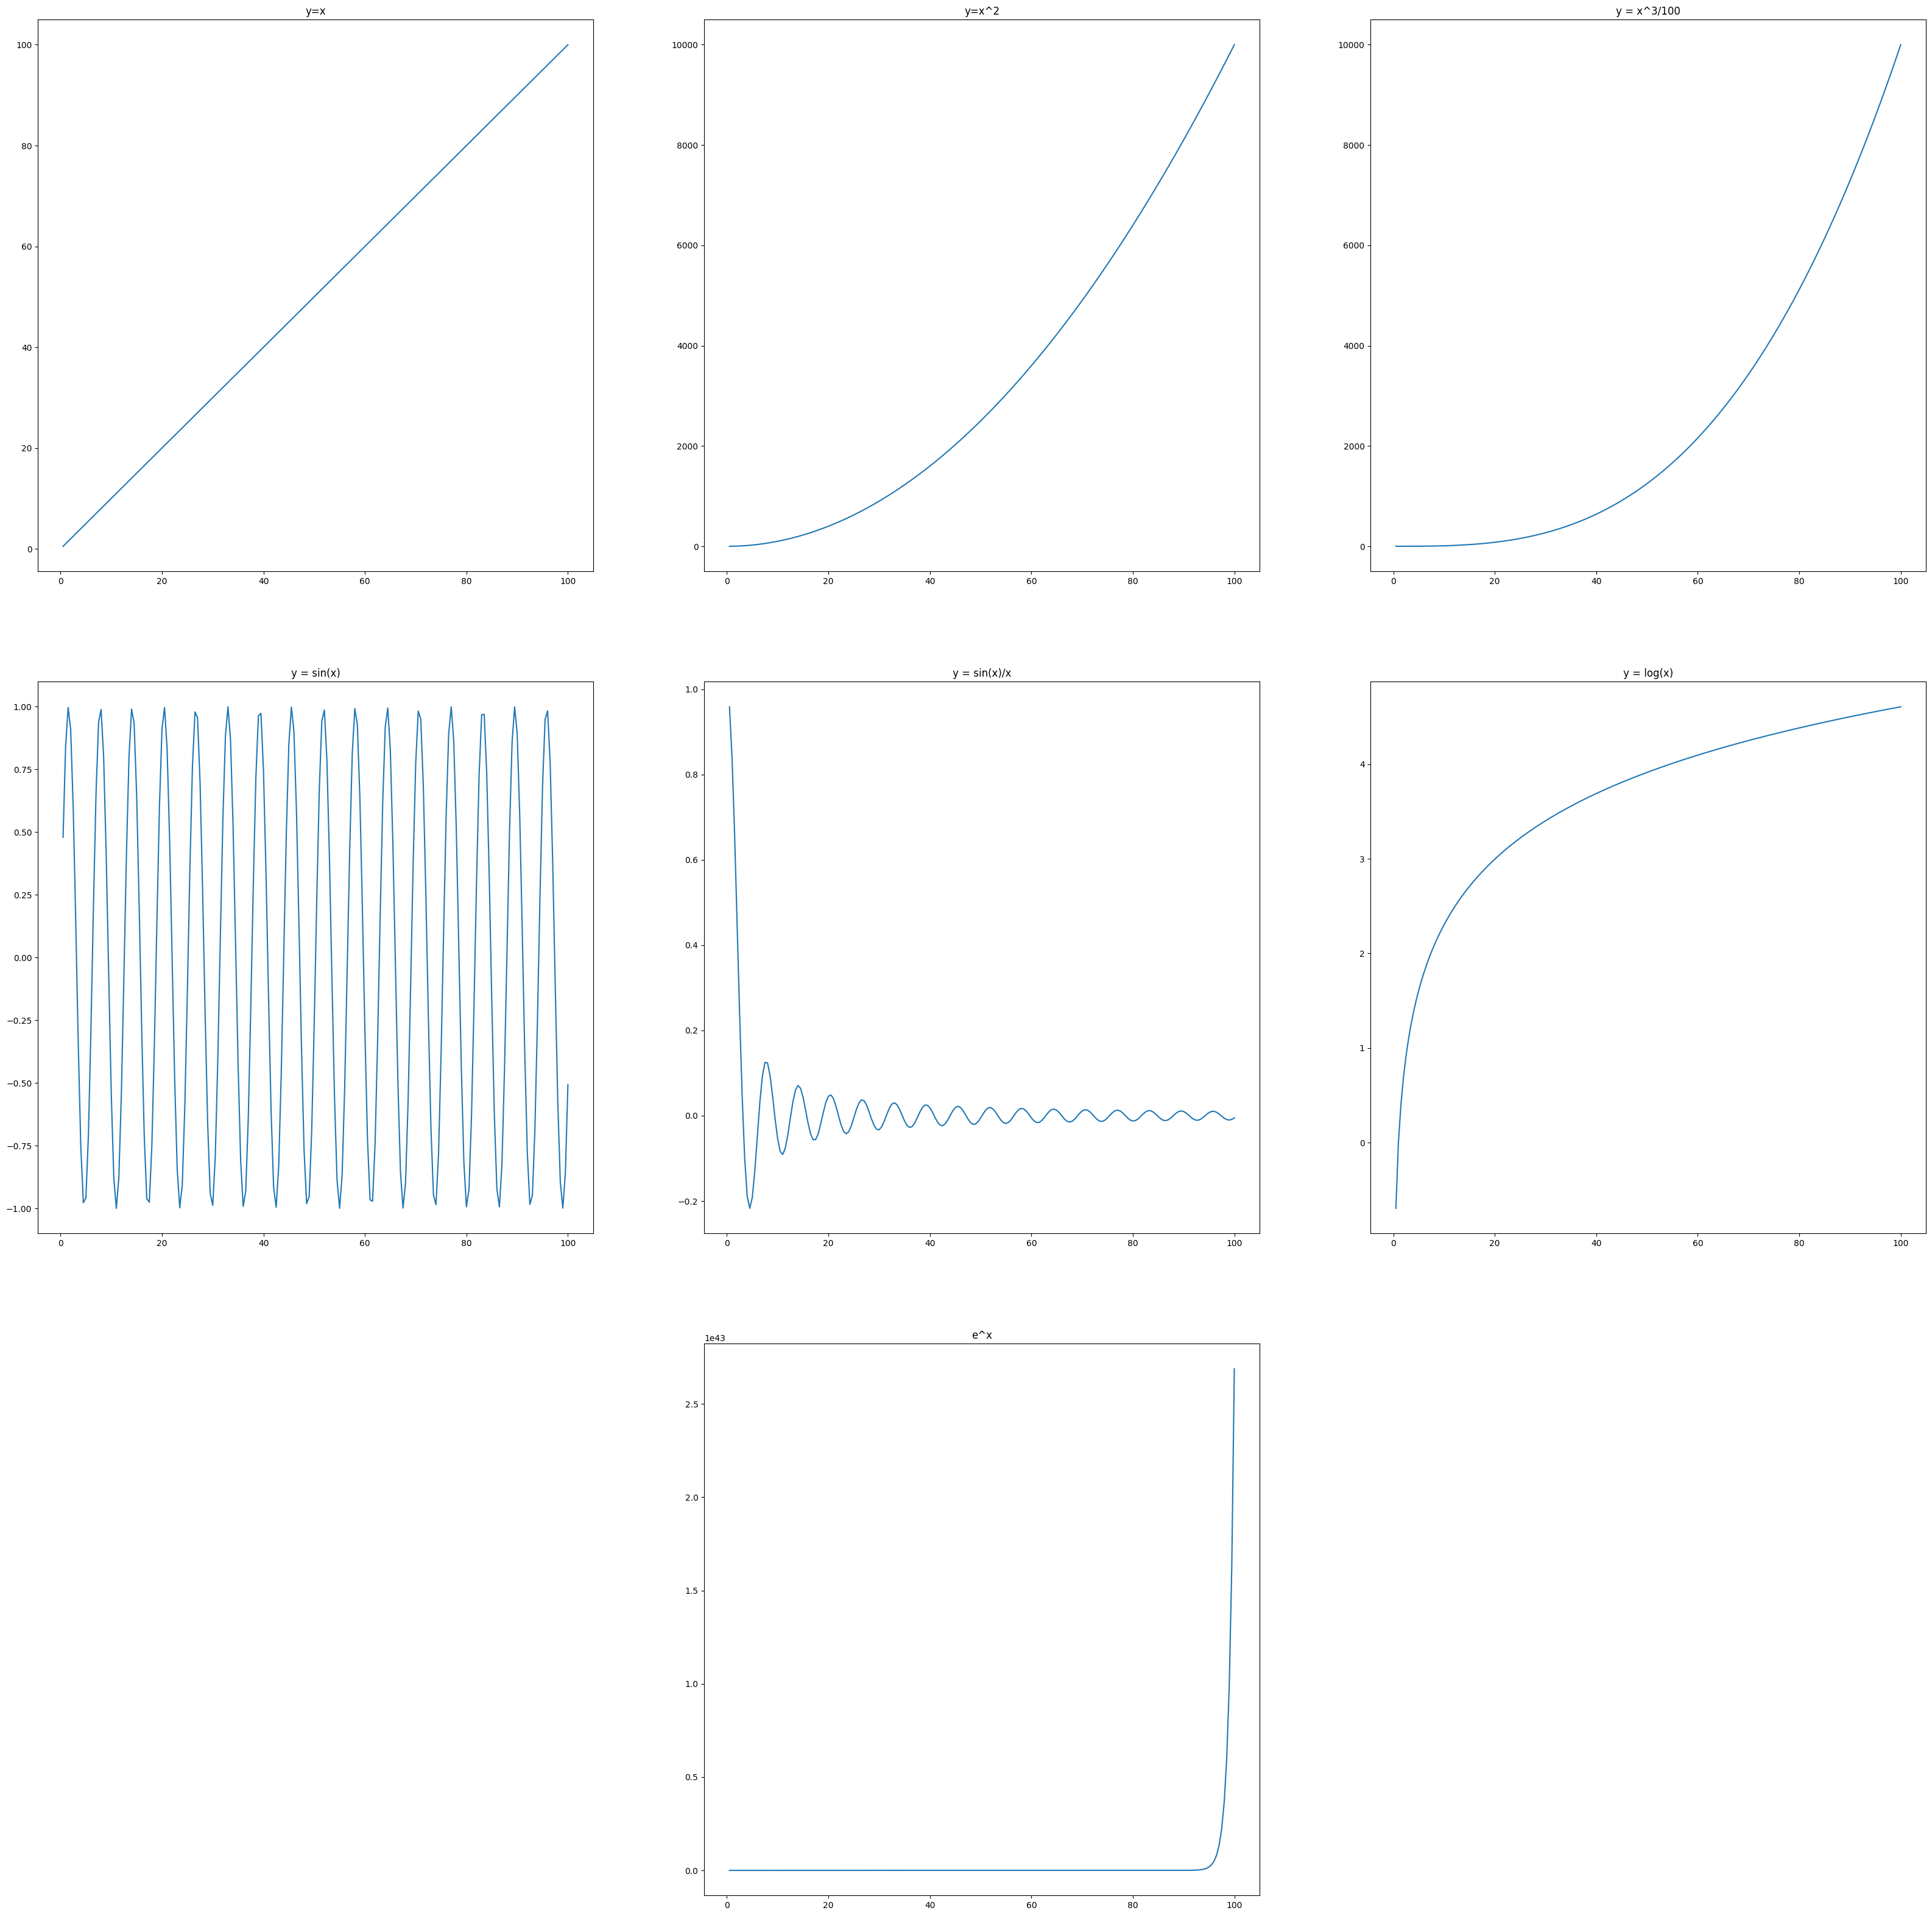

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
plt.subplot(3,3,1)
plt.plot(x,y_1)
plt.title("y=x")
plt.subplot(3,3,2)
plt.plot(x,y_2)
plt.title("y=x^2")
plt.subplot(3,3,3)
plt.plot(x,y_3)
plt.title("y = x^3/100")
plt.subplot(3,3,4)
plt.plot(x,y_4)
plt.title("y = sin(x)")
plt.subplot(3,3,5)
plt.plot(x,y_5)
plt.title("y = sin(x)/x")
plt.subplot(3,3,6)
plt.plot(x,y_6)
plt.title("y = log(x)")
plt.subplot(3,3,8)
plt.plot(x,y_7)
plt.title("e^x")
plt.show()

# Question 10
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [58]:
m = np.random.uniform(1,2,size=(20,5))

In [60]:
import pandas as pd
df = pd.DataFrame(m,columns=['a','b','c','d','e'])
print(df)

           a         b         c         d         e
0   1.859409  1.477677  1.567230  1.929192  1.998621
1   1.179652  1.985960  1.809423  1.326874  1.225049
2   1.208224  1.336455  1.079067  1.560633  1.014204
3   1.409666  1.782427  1.928433  1.963136  1.139166
4   1.824823  1.879840  1.120668  1.273444  1.523763
5   1.998806  1.172098  1.416206  1.708683  1.596154
6   1.940814  1.617652  1.351364  1.294271  1.589838
7   1.875607  1.131123  1.530319  1.344044  1.681262
8   1.481565  1.773971  1.730206  1.456368  1.521103
9   1.612649  1.274438  1.763637  1.285866  1.260556
10  1.476985  1.935393  1.675090  1.284721  1.385484
11  1.483668  1.212527  1.559580  1.026981  1.202317
12  1.268393  1.796761  1.493800  1.752169  1.168372
13  1.817223  1.466962  1.644605  1.492480  1.926027
14  1.754237  1.925181  1.728707  1.381154  1.530125
15  1.042644  1.877303  1.131720  1.990585  1.101304
16  1.279276  1.817495  1.187768  1.820763  1.093266
17  1.504291  1.565598  1.665158  1.468325  1.

In [61]:
std_ = df.std()
col = std_.idxmax()
mean_ = df.mean(axis=1)
row = mean_.idxmin()
print(f"Column with the highest standard deviation is column {col}")
print(f"Row with the lowest mean is row {row}")

Column with the highest standard deviation is column e
Row with the lowest mean is row 2


# Question 11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [62]:
df['f']=df.sum(axis=1)

In [63]:
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')


In [64]:
print(f"Number of rows where value in column g is LT8 is {len(df[df['g'] == 'LT8'])}")
lt8 = df[df['g']=='LT8']['f'].std()
gt8 = df[df['g']=='GT8']['f'].std()
print(f"Standard deviation of column 'f' for rows with 'LT8' = {lt8}")
print(f"Standard deviation of column 'f' for rows with 'GT8' = {gt8}")

Number of rows where value in column g is LT8 is 15
Standard deviation of column 'f' for rows with 'LT8' = 0.4900624201490244
Standard deviation of column 'f' for rows with 'GT8' = 0.24457471424919627


# Question 12
Write a small piece of code to explain broadcasting in numpy.

In [ ]:
a = np.array([1, 3, 7])
b = np.array([[1], [2], [3]])

print(f"Array a: {a}")
print(f"Array b:\n{b}")
print(f"Shape of array a: {a.shape}")
print(f"Shape of array b: {b.shape}")

result = a + b
print("Result of broadcasting (a + b):\n", result)
print(f"Shape of result: {result.shape}")
sub_result = a - b
mul_result = a * b
print("Result of broadcasting (a - b):\n", sub_result)
print("Result of broadcasting (a * b):\n", mul_result)

Array a: [1 3 7]
Array b:
[[1]
 [2]
 [3]]
Shape of array a: (3,)
Shape of array b: (3, 1)
Result of broadcasting (a + b):
 [[ 2  4  8]
 [ 3  5  9]
 [ 4  6 10]]
Shape of result: (3, 3)
Result of broadcasting (a - b):
 [[ 0  2  6]
 [-1  1  5]
 [-2  0  4]]
Result of broadcasting (a * b):
 [[ 1  3  7]
 [ 2  6 14]
 [ 3  9 21]]


The shape of matrix **a** is `(3,)` and the shape of matrix **b** is `(3,1)`. When adding these matrices, numpy automatically broadcasts their shapes to make them compatible for element-wise operations. 

- **a** is stretched along the rows to become a `(3,3)` matrix.
- **b** is stretched along the columns to become a `(3,3)` matrix.

This process is called **broadcasting**.

**Array 'a' after broadcast:**
\[
\begin{bmatrix}
1 & 4 & 7  \\
1 & 4 & 7 \\
1 & 4 & 7
\end{bmatrix}
\]

**Array 'b' after broadcast:**
\[
\begin{bmatrix}
1 & 1 & 1  \\
2 & 2 & 2 \\
3 & 3 & 3
\end{bmatrix}
\]

**Result of a + b:**
\[
\begin{bmatrix}
2 & 5 & 8  \\
3 & 6 & 9 \\
4 & 7 & 10
\end{bmatrix}
\]

Broadcasting allows numpy to perform operations on arrays of different shapes efficiently without explicit replication.

# Question 13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def argmin(arr):
    if not isinstance(arr, (list, np.ndarray)):
        raise ValueError("Input must be a list or numpy array.")
    if len(arr) == 0:
        return None  
    min_value = arr[0]
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

def argmin_numpy(arr):
    return np.argmin(arr)

In [68]:
array = np.random.random(20)
print(f"Array used = {arr}")
print(f"Argmin calculated by the function = {argmin(array)}")
print(f"Argmin calculated by np.argmin feature = {argmin_numpy(array)}")

Array used = [59, 69, 43, 49, 86, 32, 30, 84, 29, 14, 68, 6, 44, 39, 98, 57, 56, 52, 48, 30, 22, 45, 5, 58, 90, 30, 96, 1, 75, 1, 87, 18, 33, 93, 24, 8, 95, 52, 91, 64, 98, 22, 24, 53, 44, 29, 50, 75, 94, 73, 37, 95, 74, 65, 3, 62, 62, 88, 86, 88, 30, 47, 52, 52, 6, 81, 5, 65, 44, 31, 30, 73, 96, 11, 67, 59, 40, 7, 39, 41, 2, 8, 49, 38, 66, 82, 36, 14, 10, 59, 59, 49, 72, 91, 19, 79, 30, 7, 54, 85, 39, 4, 13, 84, 26, 19, 89, 92, 8, 28, 26, 35, 68, 66, 8, 24, 9, 80, 37, 49, 22, 6, 96, 89, 59, 59, 80, 77, 81, 70, 1, 12, 37, 77, 58, 76, 60, 10, 11, 11, 20, 40, 66, 27, 66, 77, 21, 75, 43, 67, 66, 12, 71, 89, 53, 12, 43, 58, 3, 79, 80, 93, 64, 95, 56, 42, 33, 12, 19, 94, 31, 26, 13, 40, 73, 70, 49, 8, 70, 59, 51, 32, 49, 26, 73, 53, 49, 38, 37, 58, 26, 83, 19, 85, 41, 60, 12, 4, 67, 96, 7, 23, 77, 79, 73, 1, 24, 69, 37, 78, 49, 32, 81, 78, 61, 81, 77, 15, 58, 77, 35, 11, 41, 13, 35, 3, 57, 60, 87, 20, 88, 1, 53, 90, 89, 33, 42, 64, 24, 15, 41, 61, 4, 32, 76, 21, 15, 47, 93, 29, 69, 66, 61, 